# EDA ON LATEST DATASET

## Importing libs

In [2]:
import pandas as pd                       # for reading the files
import numpy as np                        # for creating multi-dimensional-array
import matplotlib.pyplot as plt           # for plotting
import seaborn as sns                     # for data visulization
import warnings  
from statistics import mean 
from sklearn import tree
from sklearn import metrics# for ignoring the warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.metrics import classification_report
#import scikitplot as skplt
#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

C:\Users\prana\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading csv

In [3]:
cds = pd.read_csv("corrected_dataset.csv")

# EDA

In [73]:
cds.describe(include="all")

,Text,Label,corrected_label
count,8086,8086.000000,8086.000000
unique,8086,NaN,NaN
top,Excuse me.,NaN,NaN
freq,1,NaN,NaN
mean,NaN,5.521271,4.183403
std,NaN,0.995714,2.414423
min,NaN,0.000000,-1.000000
25%,NaN,5.000000,3.000000
50%,NaN,6.000000,5.000000
75%,NaN,6.000000,6.000000


In [43]:
#not necessory
#cds=cds.iloc[:10000,]

In [38]:
cds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             10086 non-null  object
 1   Label            10086 non-null  int64 
 2   corrected_label  10086 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 236.5+ KB


In [5]:
cds.head()

,Text,Label,corrected_label
0,Excuse me.,6,3
1,Do you have your forms?,5,6
2,Yeah.,6,6
3,Let me see them.,6,6
4,Is there a problem?,5,6


In [72]:
cds.shape

(8086, 3)

In [8]:
cds.dtypes

Text               object
Label               int64
corrected_label     int64
dtype: object

In [10]:
print(pd.isnull(cds).sum())

Text               0
Label              0
corrected_label    0
dtype: int64


#### COL = 3, COUNT = 10086, DTYPE = OBJ & INT ,NO NULL VALUE

In [23]:
cds['Label'].value_counts()

6    6934
5    2742
1     175
2     150
3      53
0      24
4       8
Name: Label, dtype: int64

In [33]:
cds['corrected_label'].value_counts()

 6    5026
 5    1813
 3     831
-1     719
 1     677
 0     651
 4     369
Name: corrected_label, dtype: int64

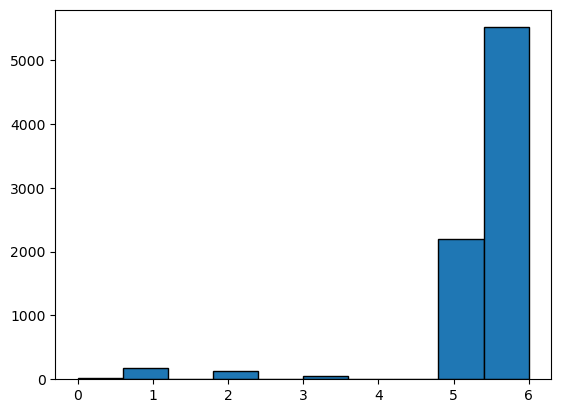

In [68]:
plt.hist(cds['Label'])
plt.show()

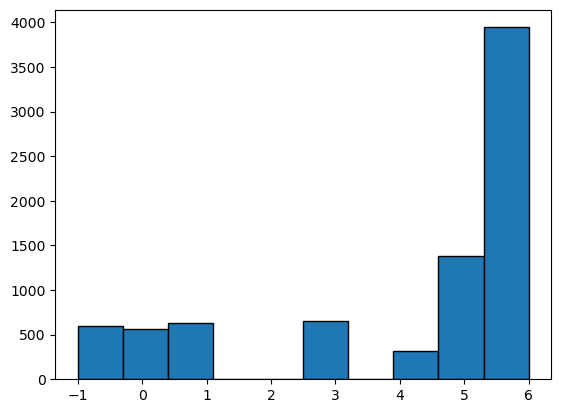

In [67]:
plt.hist(cds['corrected_label'])
plt.show()

## comparing 2 features

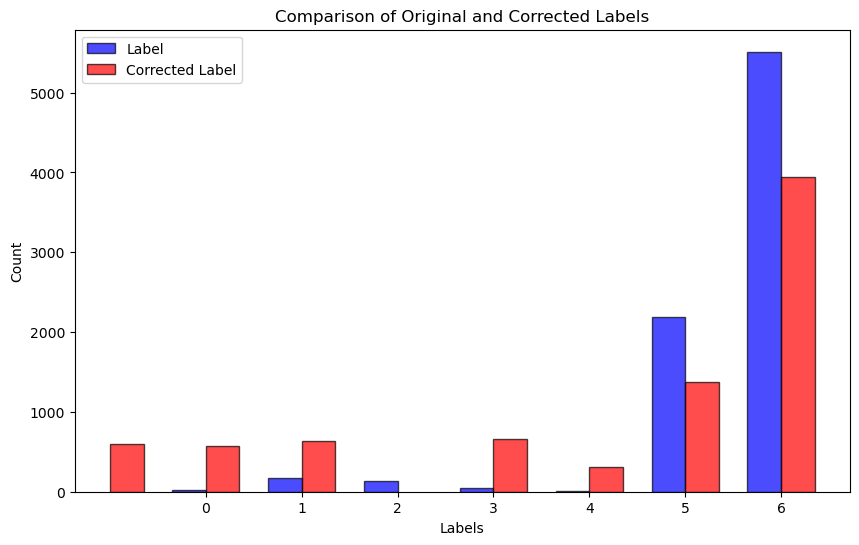

In [69]:
# Create a bar graph comparing the counts of each label and corrected label
labels = cds['Label'].value_counts().sort_index()
corrected_labels = cds['corrected_label'].value_counts().sort_index()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # Width of the bars

# Bar positions
label_positions = labels.index - width / 2
corrected_label_positions = corrected_labels.index + width / 2

# Plot bars
ax.bar(label_positions, labels, width, label='Label', color='b', alpha=0.7)
ax.bar(corrected_label_positions, corrected_labels, width, label='Corrected Label', color='r', alpha=0.7)

# Labels and title
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
ax.set_title('Comparison of Original and Corrected Labels')
ax.set_xticks(labels.index)
ax.legend()

# Show the plot
plt.show()

## Probability of emotions

<AxesSubplot:>

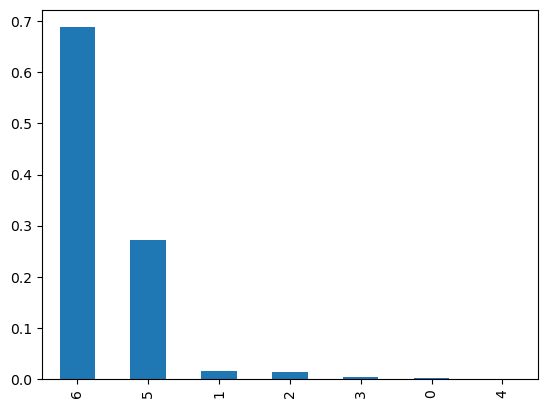

In [26]:
cds['Label'].value_counts(normalize=True).plot.bar()
# normalize=True to get probability

<AxesSubplot:>

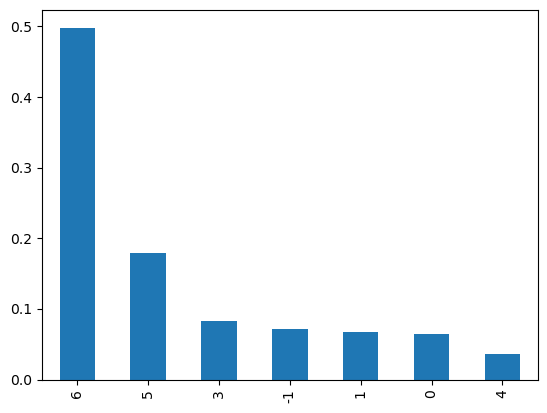

In [35]:
cds['corrected_label'].value_counts(normalize=True).plot.bar()

## Percentage 

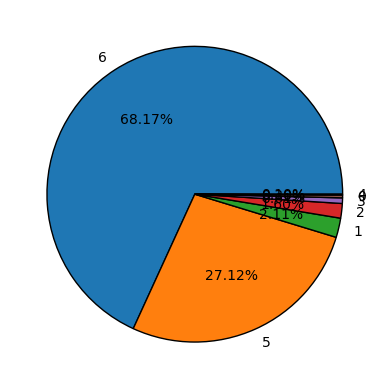

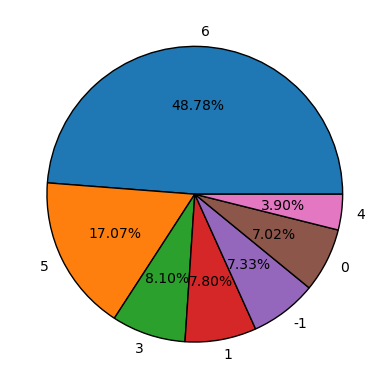

In [70]:
plt.pie(cds['Label'].value_counts()[:15],labels =cds['Label'].value_counts()[:15].index, startangle = 360, autopct='%1.2f%%')
plt.show()
plt.pie(cds['corrected_label'].value_counts()[:15],labels =cds['corrected_label'].value_counts()[:15].index, startangle = 360, autopct='%1.2f%%')
plt.show()

## density

<AxesSubplot:xlabel='Label', ylabel='Density'>

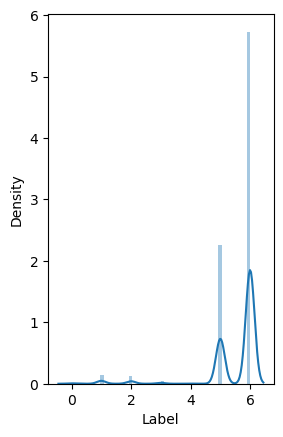

In [27]:
plt.subplot(121)
sns.distplot(cds['Label'])
#for density

<AxesSubplot:xlabel='corrected_label', ylabel='Density'>

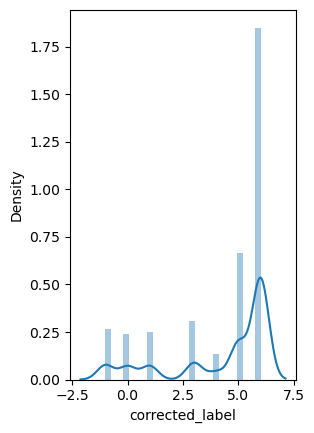

In [36]:
plt.subplot(121)
sns.distplot(cds['corrected_label'])

campare=pd.crosstab(cds['Label'],cds['corrected_label']) 
campare

campare.div(campare.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

sns.pairplot(cds)

cds.corr()

matrix = cds.corr() 
plt.figure(figsize=(9,6))
sns.heatmap(matrix, square=True, cmap="BuPu")

### Drop duplicates

In [71]:
cds.shape

(8086, 3)

In [41]:
cds.drop_duplicates(subset='Text', keep='first', inplace=True)

In [42]:
cds.shape

(8086, 3)

## observations

corrected labels are much diverse than labels and labels are tilted towards '6'

label '2' can be droped or switched

corrected labels have a extra feature(-1) wchich dose not show any emotion so it can be removed 